# Incidents dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import folium
from folium.plugins import HeatMap
import matplotlib.colors as mcolors

In [11]:
filepath = r"C:/Users/clara/OneDrive - Danmarks Tekniske Universitet/Skrivebord/DTU/Human Centeret Artificial Intelligence/2. semester/02806_Social_Data_Analysis_and_Visualization/MTA_Subway_Major_Incidents__Beginning_2020_20250429.csv"
df = pd.read_csv(filepath)

In [12]:
print(df.columns)
print(df.head())

Index(['month', 'division', 'line', 'day_type', 'category', 'count'], dtype='object')
        month    division line  day_type                            category  \
0  2024-12-01  A DIVISION    1         1                               Other   
1  2024-12-01  A DIVISION    1         1  Persons on Trackbed/Police/Medical   
2  2024-12-01  A DIVISION    1         1                             Signals   
3  2024-12-01  A DIVISION    2         1                          Subway Car   
4  2024-12-01  A DIVISION    2         1                             Signals   

   count  
0      1  
1      1  
2      2  
3      1  
4      3  


In [13]:
# Parse 'month' as datetime
df['month'] = pd.to_datetime(df['month'])

# Group by 'month' and sum the 'count'
monthly_incidents = df.groupby('month')['count'].sum().reset_index()

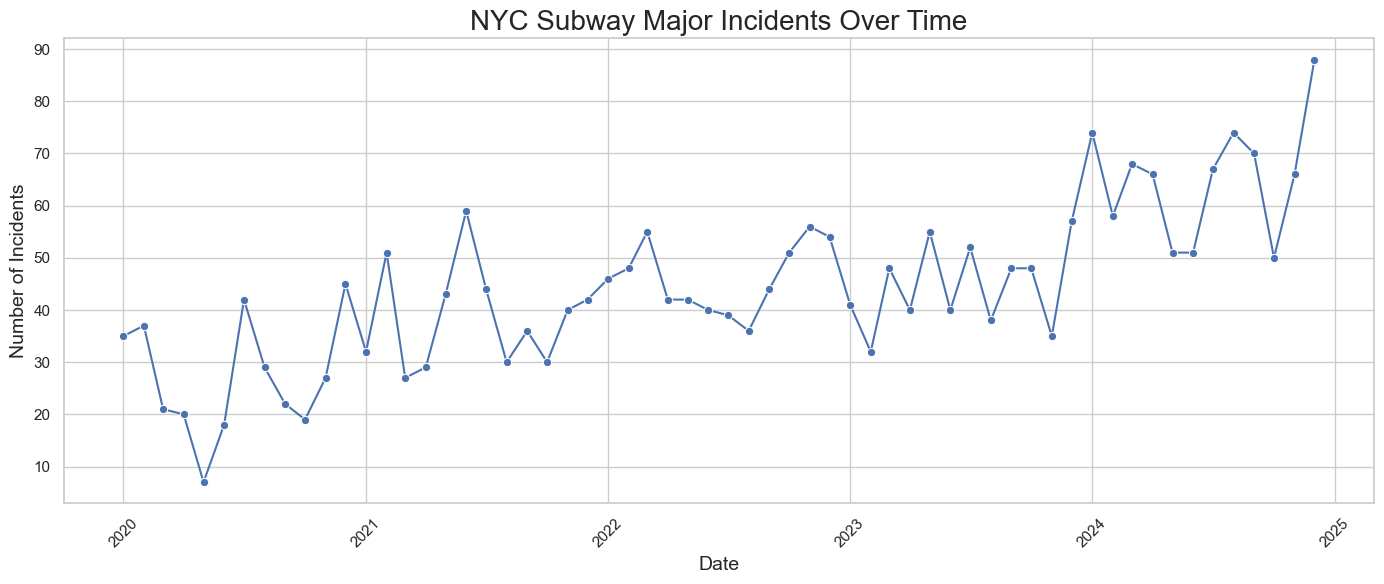

In [14]:
# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_incidents, x='month', y='count', marker="o")
plt.title('NYC Subway Major Incidents Over Time', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

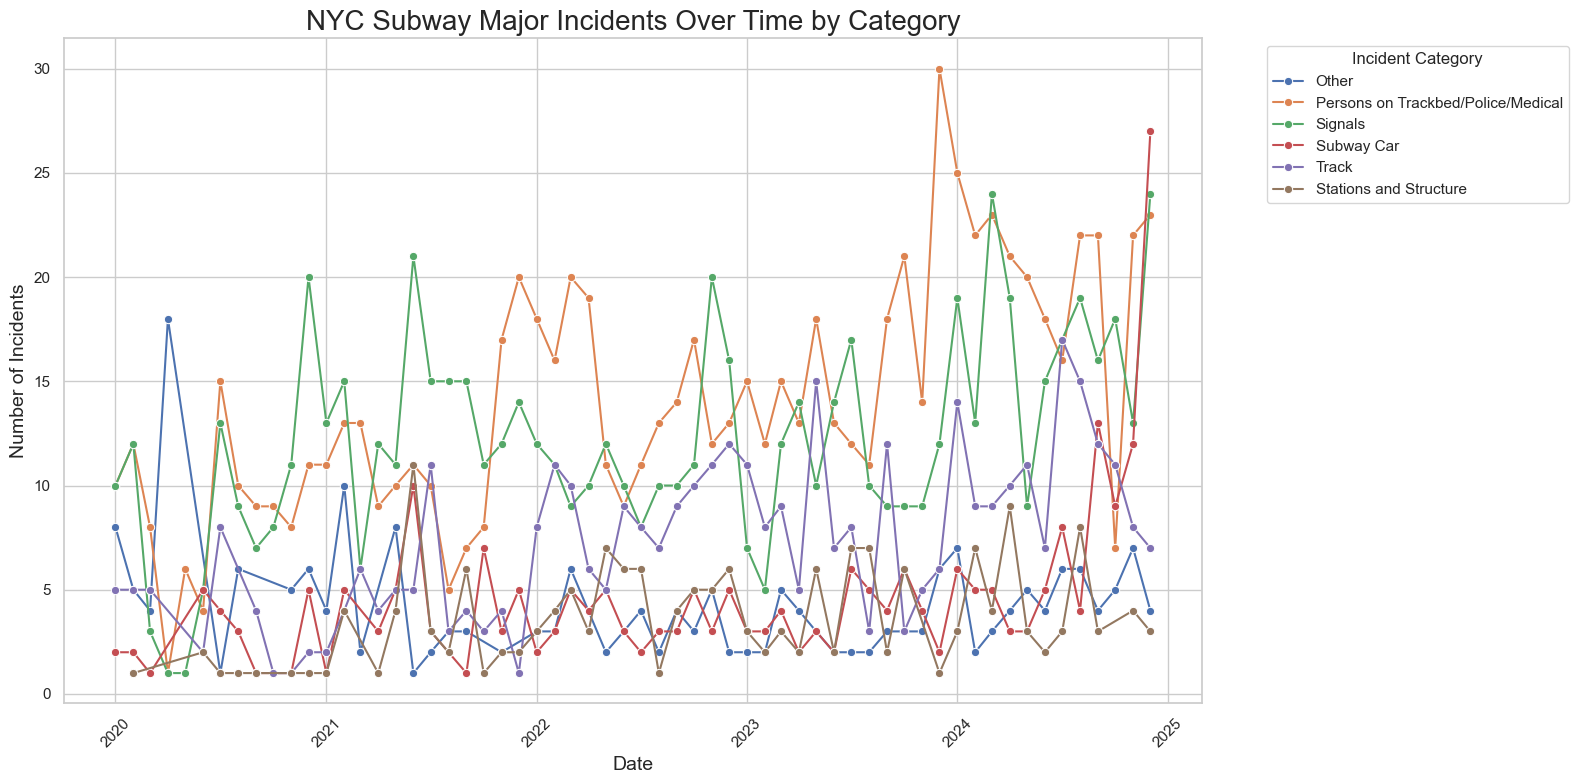

In [15]:
# Group by both 'month' and 'category', then sum counts
monthly_category = df.groupby(['month', 'category'])['count'].sum().reset_index()

# Plot
plt.figure(figsize=(16,8))
sns.lineplot(data=monthly_category, x='month', y='count', hue='category', marker="o")

plt.title('NYC Subway Major Incidents Over Time by Category', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Incident Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


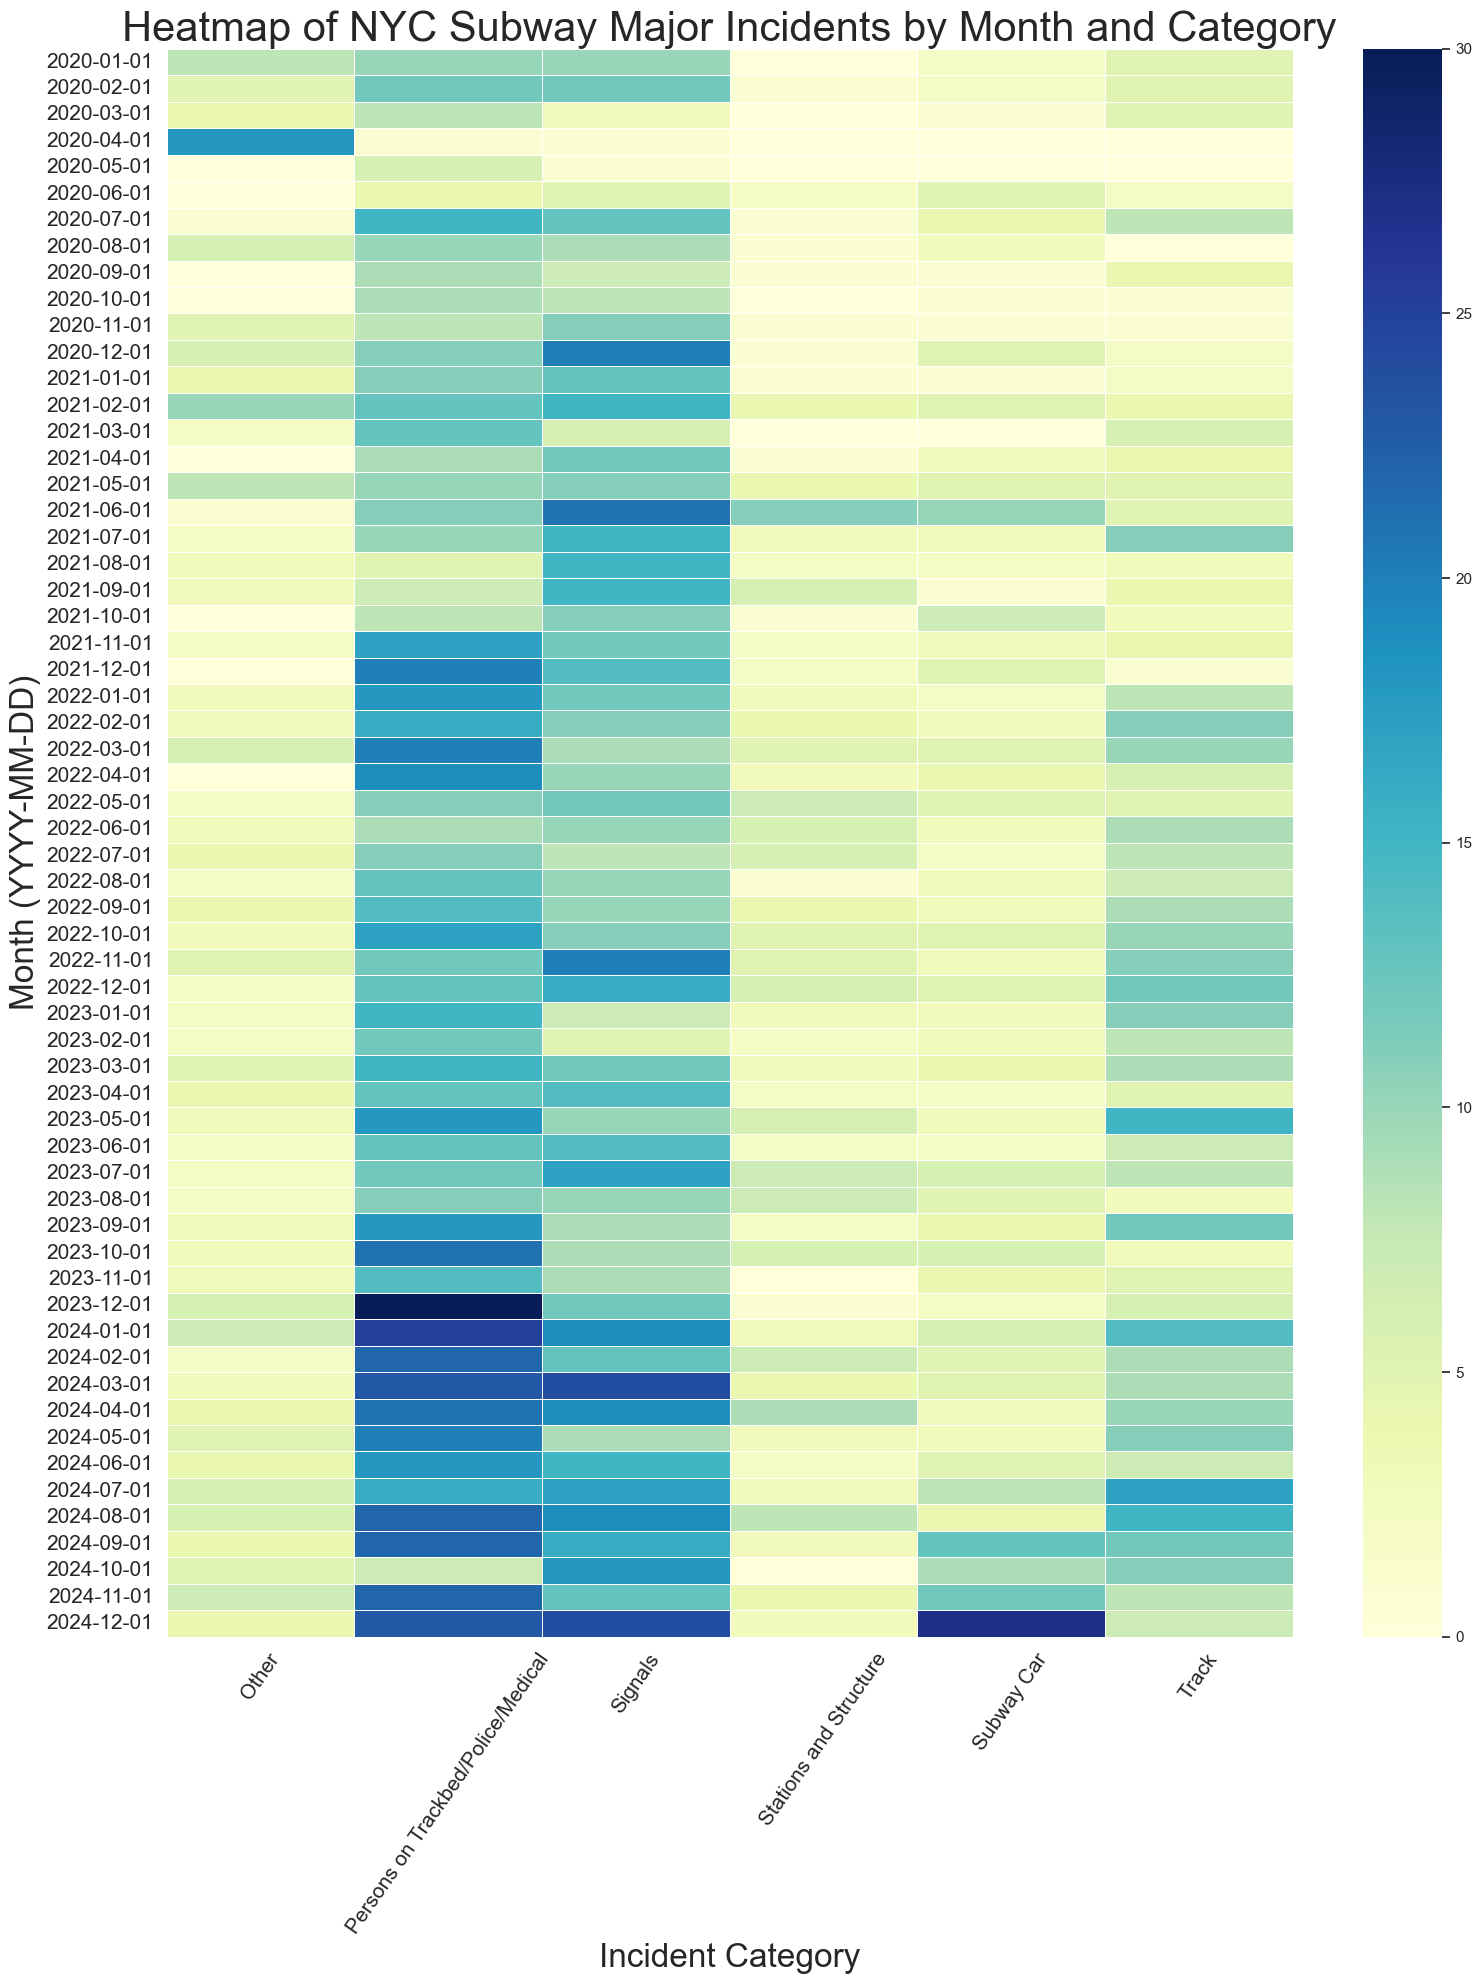

In [48]:
# Ensure 'month' column is in datetime format
df['month'] = pd.to_datetime(df['month'])

# Create pivot table for the heatmap
heatmap_data = df.pivot_table(index='month', columns='category', values='count', aggfunc='sum', fill_value=0)
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)  # Sort categories alphabetically

# Convert index to string with format YYYY-MM-DD for better y-axis labels
heatmap_data.index = heatmap_data.index.strftime('%Y-%m-%d')

# --- HEATMAP 1: YlGnBu palette, NO annotations ---
plt.figure(figsize=(16, 20))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, linewidths=0.5)
plt.title('Heatmap of NYC Subway Major Incidents by Month and Category', fontsize=30)
plt.xlabel('Incident Category', fontsize=24)
plt.ylabel('Month (YYYY-MM-DD)', fontsize=24)
plt.xticks(rotation=55, fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


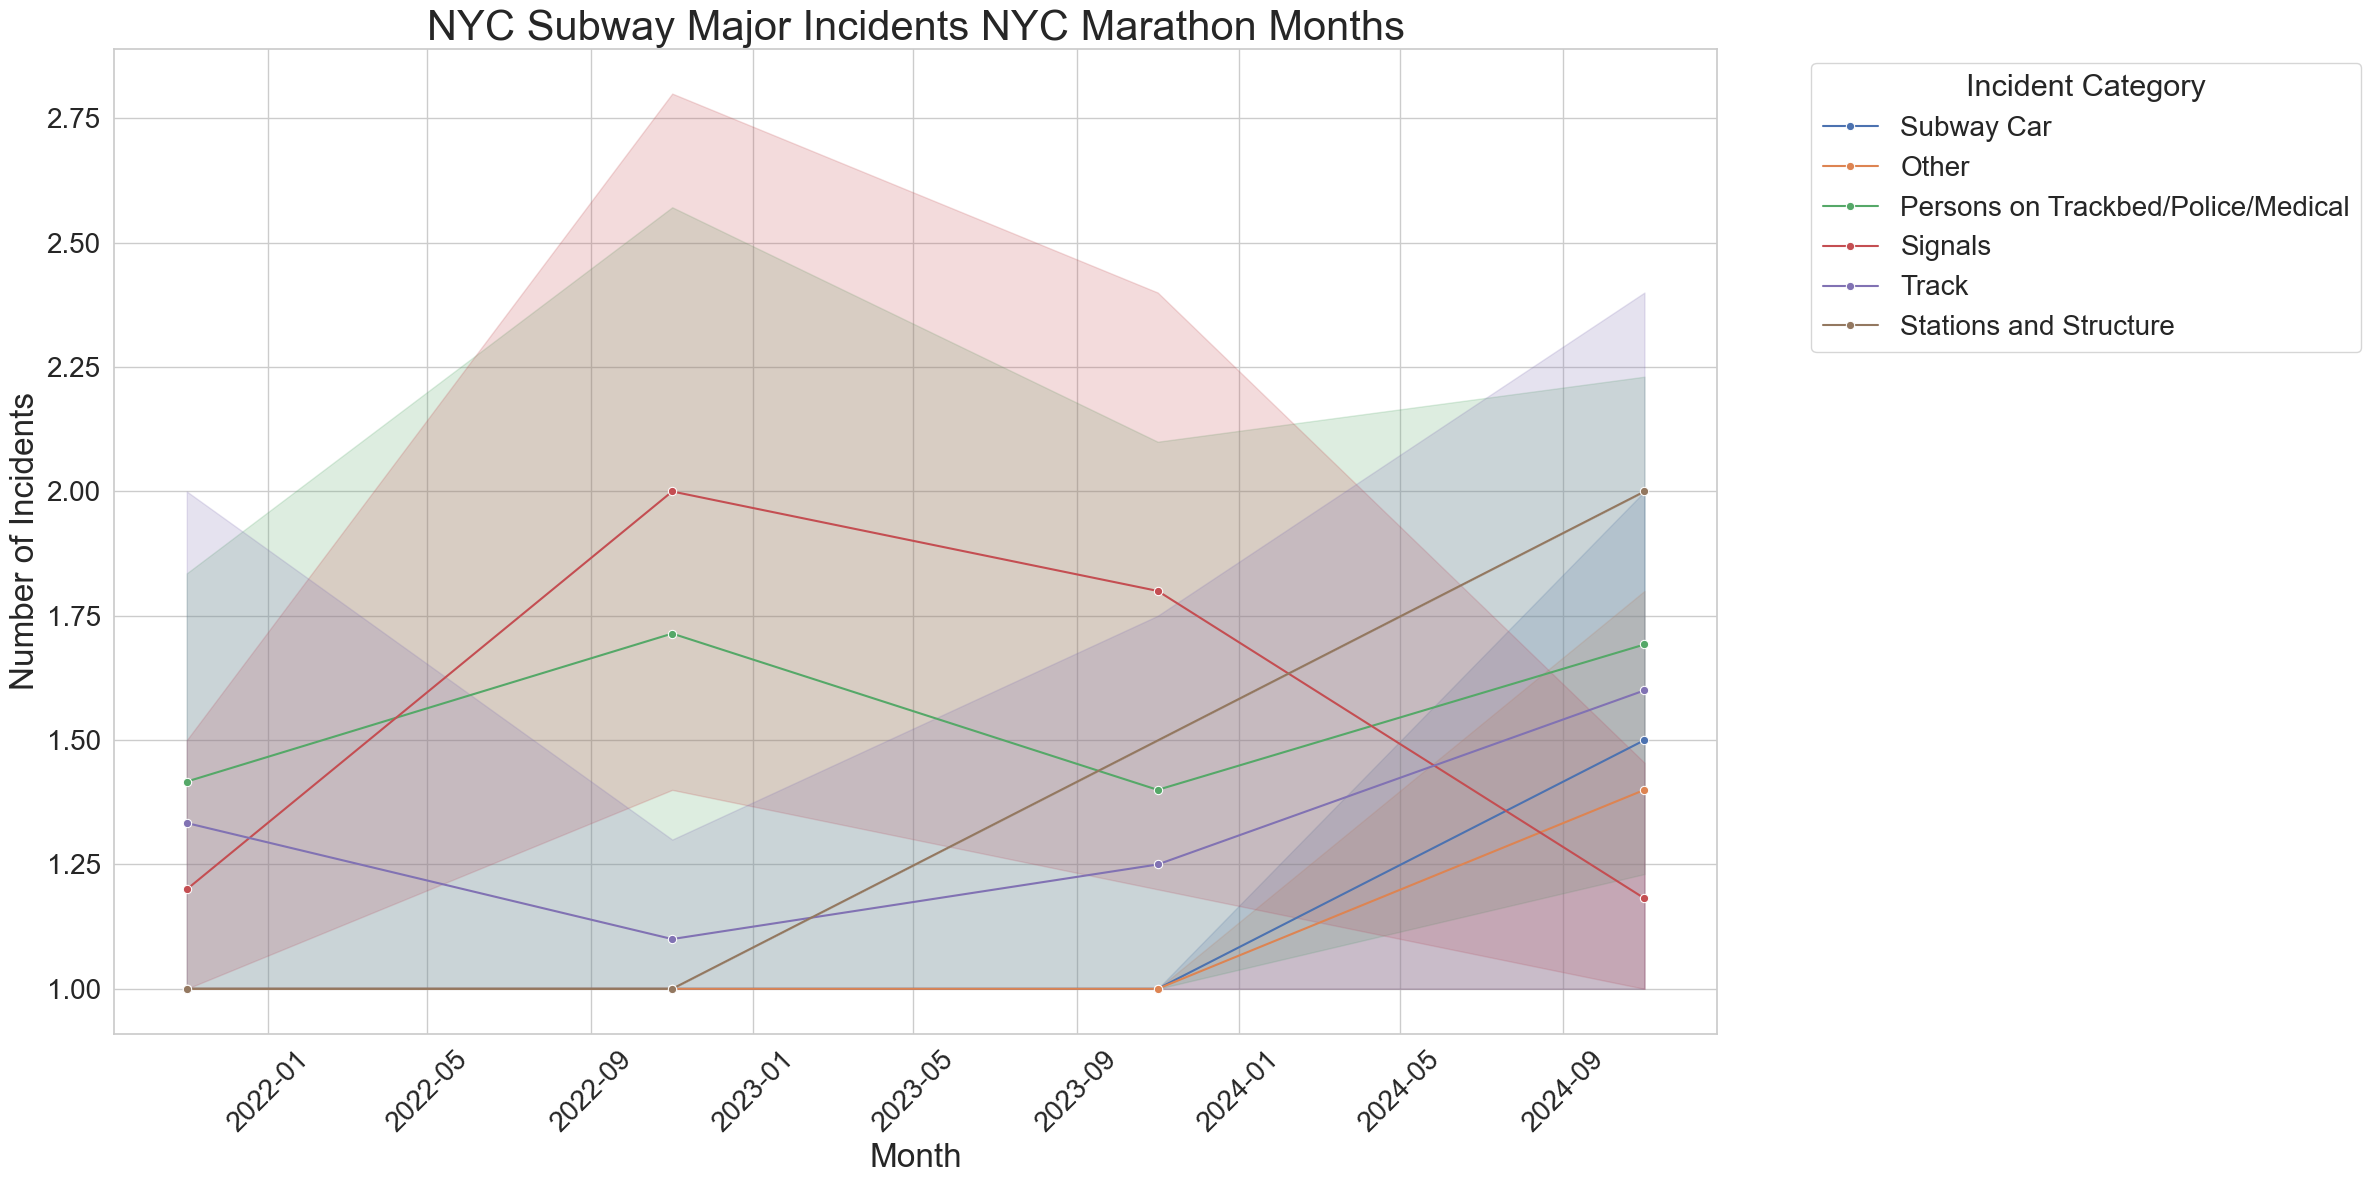

In [63]:
# --- Marathon Incident Timeline ---

# Ensure 'month' is datetime and rounded to start of month
df['month'] = pd.to_datetime(df['month'])
df['month'] = df['month'].dt.to_period('M').dt.to_timestamp()

# Filter for Marathon months
marathon_months = pd.to_datetime(['2021-11', '2022-11', '2023-11', '2024-11'])
marathon_df = df[df['month'].isin(marathon_months)].copy()

# Plot
plt.figure(figsize=(24, 12))
sns.lineplot(data=marathon_df, x='month', y='count', hue='category', marker='o')
plt.title('NYC Subway Major Incidents NYC Marathon Months', fontsize=30)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.legend(
    title='Incident Category',
    title_fontsize=22,  # Adjusted for larger title
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=20  # Legend label font size
)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


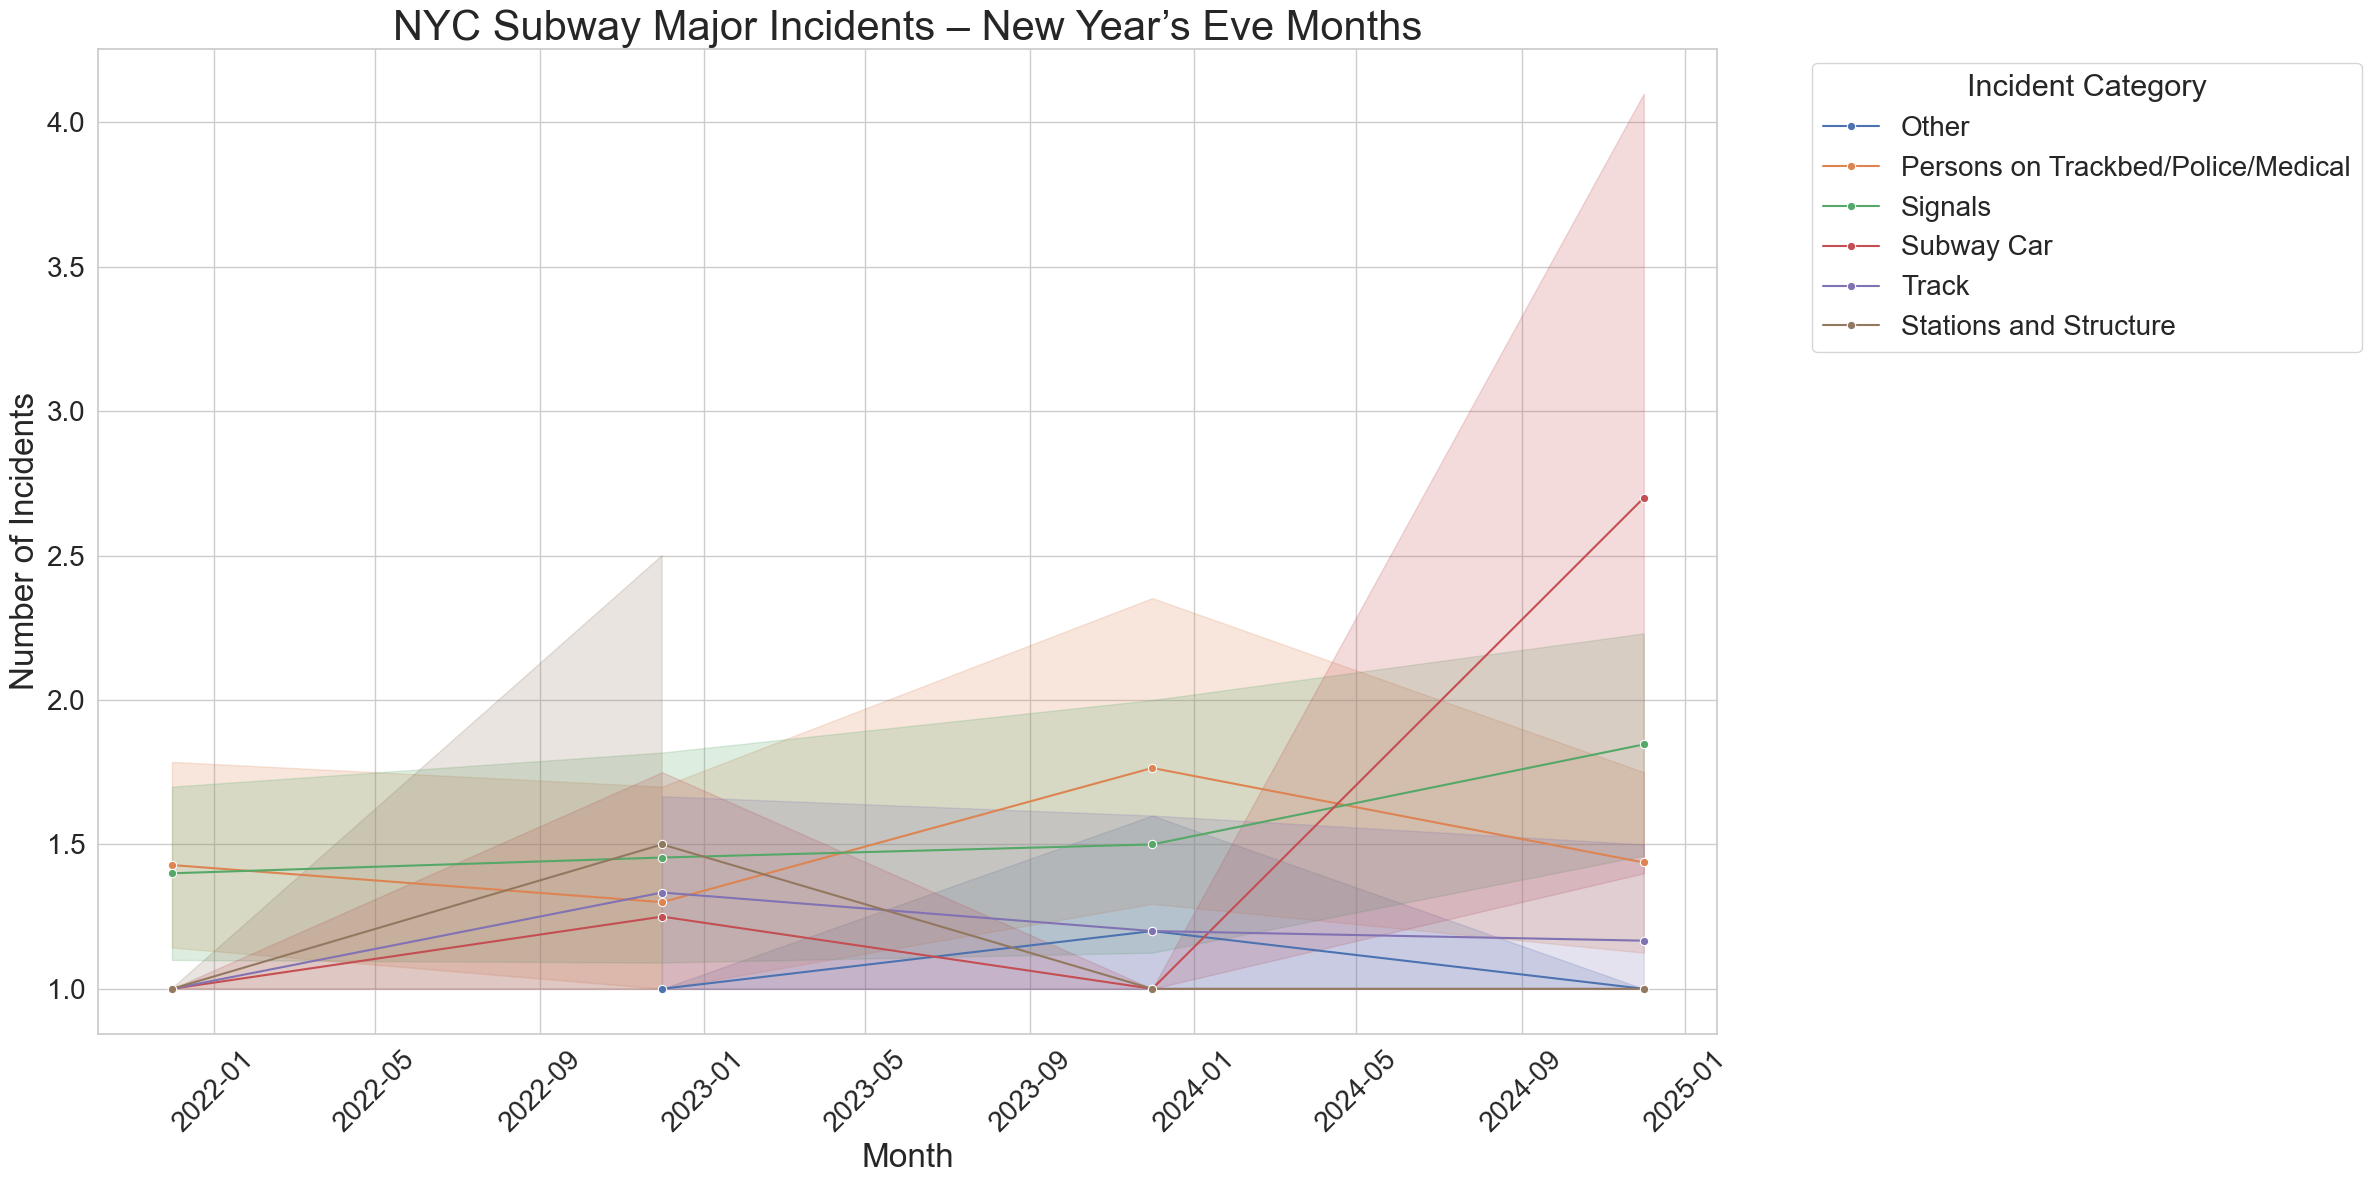

In [62]:
# --- New Year's Eve Incident Timeline ---

# Filter for December months (when NYE happens)
nye_months = pd.to_datetime(['2021-12', '2022-12', '2023-12', '2024-12'])
nye_df = df[df['month'].isin(nye_months)].copy()

# Plot
# Plot
plt.figure(figsize=(24, 12))
sns.lineplot(data=nye_df, x='month', y='count', hue='category', marker='o')
plt.title('NYC Subway Major Incidents – New Year’s Eve Months', fontsize=30)
plt.xlabel('Month', fontsize=24)
plt.ylabel('Number of Incidents', fontsize=24)
plt.legend(
    title='Incident Category',
    title_fontsize=22,  # Adjusted for larger title
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=20  # Legend label font size
)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()



In [82]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Assuming df is your dataframe with columns: month, category, count
# Ensure 'month' is datetime and normalize to month start
df['month'] = pd.to_datetime(df['month']).dt.to_period('M').dt.to_timestamp()

# Define Marathon months
marathon_months = pd.to_datetime(['2021-11', '2022-11', '2023-11', '2024-11'])

# Create a flag column for Marathon or not
df['event_type'] = df['month'].isin(marathon_months)
df['event_type'] = df['event_type'].replace({True: 'Marathon', False: 'Regular'})

# Group and aggregate
grouped = df.groupby(['month', 'category', 'event_type'], as_index=False)['count'].sum()

# Calculate year-over-year percentage changes for marathon months
marathon_data = grouped[grouped['event_type'] == 'Marathon'].copy()
marathon_data['year'] = marathon_data['month'].dt.year
marathon_yoy = marathon_data.pivot_table(
    index=['year', 'category'], 
    values='count', 
    aggfunc='sum'
).reset_index()

# Create a more sophisticated visualization with subplots
fig = make_subplots(
    rows=2, cols=1,
    row_heights=[0.7, 0.3],
    subplot_titles=(
        "NYC Subway Major Incidents — Marathon vs. Regular Months",
        "Monthly Incident Distribution by Category"
    ),
    vertical_spacing=0.15
)

# Custom color palette for better visual distinction
colors = px.colors.qualitative.Bold
category_colors = {cat: colors[i % len(colors)] for i, cat in enumerate(grouped['category'].unique())}

# Add main time series lines to first subplot
for i, category in enumerate(sorted(grouped['category'].unique())):
    for event_type in ['Marathon', 'Regular']:
        subset = grouped[(grouped['category'] == category) & (grouped['event_type'] == event_type)]
        
        # Sort by date for proper line connection
        subset = subset.sort_values('month')
        
        # Line style based on event type
        dash_style = 'dot' if event_type == 'Regular' else 'solid'
        marker_size = 8 if event_type == 'Marathon' else 6
        
        fig.add_trace(
            go.Scatter(
                x=subset['month'],
                y=subset['count'],
                mode='lines+markers',
                name=f"{category} ({event_type})",
                line=dict(color=category_colors[category], dash=dash_style, width=2),
                marker=dict(size=marker_size, line=dict(width=1, color='white')),
                hovertemplate='<b>%{x|%b %Y}</b><br>' +
                              'Category: ' + category + '<br>' +
                              'Month Type: ' + event_type + '<br>' +
                              'Incidents: %{y}<extra></extra>'
            ),
            row=1, col=1
        )

# Add rolling average for overall trend
overall_monthly = grouped.groupby('month', as_index=False)['count'].sum()
overall_monthly = overall_monthly.sort_values('month')
overall_monthly['rolling_avg'] = overall_monthly['count'].rolling(window=3, center=True).mean()

fig.add_trace(
    go.Scatter(
        x=overall_monthly['month'],
        y=overall_monthly['rolling_avg'],
        mode='lines',
        line=dict(color='rgba(0,0,0,0.5)', width=2, dash='dash'),
        name='3-Month Rolling Average (All Categories)',
        hovertemplate='<b>%{x|%b %Y}</b><br>3-Month Avg: %{y:.1f}<extra></extra>'
    ),
    row=1, col=1
)

# Add vertical shaded regions for marathon months
for marathon_month in marathon_months:
    month_start = marathon_month
    month_end = month_start + pd.DateOffset(months=1)
    
    fig.add_shape(
        type="rect",
        x0=month_start,
        x1=month_end,
        y0=0,
        y1=1,
        yref="paper",
        fillcolor="rgba(220,220,220,0.3)",
        layer="below",
        line_width=0,
        row=1, col=1
    )
    
    # Add marathon month label
    fig.add_annotation(
        x=month_start + pd.DateOffset(days=15),
        y=1.02,
        text=f"NYC Marathon<br>{month_start.strftime('%b %Y')}",
        showarrow=False,
        yref="paper",
        font=dict(size=10, color="rgba(0,0,0,0.6)"),
        row=1, col=1
    )

# Add monthly distributions as a stacked bar chart in second subplot
monthly_dist = grouped.pivot_table(
    index='month', 
    columns='category', 
    values='count', 
    aggfunc='sum'
).fillna(0)

# Get month and year for x-axis labels
monthly_dist = monthly_dist.reset_index()
monthly_dist['month_year'] = monthly_dist['month'].dt.strftime('%b %Y')

for category in monthly_dist.columns[1:-1]:  # Skip 'month' and 'month_year'
    fig.add_trace(
        go.Bar(
            x=monthly_dist['month_year'],
            y=monthly_dist[category],
            name=category,
            marker_color=category_colors[category],
            hovertemplate='<b>%{x}</b><br>' +
                          'Category: ' + category + '<br>' +
                          'Incidents: %{y}<extra></extra>'
        ),
        row=2, col=1
    )

# Highlight marathon months in the bottom chart
for marathon_month in marathon_months:
    month_year = marathon_month.strftime('%b %Y')
    idx = monthly_dist[monthly_dist['month_year'] == month_year].index
    
    if len(idx) > 0:
        fig.add_shape(
            type="rect",
            x0=month_year,
            x1=month_year,
            xref="x2",
            y0=0,
            y1=1,
            yref="paper",
            fillcolor="rgba(255,200,200,0.0)",
            line=dict(color="rgba(255,0,0,0.5)", width=2),
            layer="below",
            row=2, col=1
        )

# Layout improvements
fig.update_layout(
    template="plotly_white",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.5,
        xanchor="center",
        x=0.5,
        itemsizing="constant",
        font=dict(size=12)
    ),
    hovermode="x unified",
    hoverlabel=dict(bgcolor="white", font_size=12),
    font=dict(family="Arial, sans-serif", size=12),
    width=1000,
    height=800,
    margin=dict(t=100, b=150, l=80, r=40),
    barmode='stack'
)

# X-axis formatting
fig.update_xaxes(
    title_text="",
    tickangle=45,
    tickfont=dict(size=10),
    dtick="M3",  # Show every 3 months
    tickformat="%b %Y",
    row=1, col=1
)

fig.update_xaxes(
    title_text="",
    tickangle=45,
    tickfont=dict(size=10),
    dtick=2,  # Show every other label to prevent overcrowding
    row=2, col=1
)

# Y-axis formatting
fig.update_yaxes(
    title_text="Number of Incidents",
    title_font=dict(size=14),
    gridcolor='rgba(200,200,200,0.2)',
    row=1, col=1
)

fig.update_yaxes(
    title_text="Number of Incidents",
    title_font=dict(size=14),
    gridcolor='rgba(200,200,200,0.2)',
    row=2, col=1
)

# Add title and annotations
fig.add_annotation(
    text="NYC Subway Incidents Analysis: Marathon Impact",
    xref="paper", yref="paper",
    x=0.5, y=1.12,
    showarrow=False,
    font=dict(size=20, family="Arial, sans-serif", color="#333")
)

fig.add_annotation(
    text="Source: NYC MTA Data (2021-2024)",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,
    showarrow=False,
    font=dict(size=10, color="gray")
)

# Save as HTML with configuration options
fig.write_html(
    "nyc_incidents_marathon_analysis.html",
    include_plotlyjs=True,
    config={
        'displayModeBar': True,
        'modeBarButtonsToRemove': ['select2d', 'lasso2d'],
        'displaylogo': False,
        'toImageButtonOptions': {
            'format': 'png',
            'filename': 'nyc_subway_marathon_analysis',
            'height': 800,
            'width': 1000,
            'scale': 2
        }
    }
)

# Show figure
fig.show()

In [117]:
# Use this code with your actual dataframe named 'df'
# This creates a bar plot of subway incidents during marathon months
# --- Marathon Incident Timeline --- #
# Ensure 'month' is datetime and rounded to start of month
df['month'] = pd.to_datetime(df['month'])
df['month'] = df['month'].dt.to_period('M').dt.to_timestamp()
# Filter for Marathon months
marathon_months = pd.to_datetime(['2021-11', '2022-11', '2023-11', '2024-11'])
marathon_df = df[df['month'].isin(marathon_months)].copy()
# Define custom color palette to match your image
color_map = {
    'Subway Car': '#F4784A',      # blue
    'Other': '#FFCC17',           # orange
    'Persons on Trackbed/Police/Medical': '#63BDBD',  # green
    'Signals': '#87BB62',         # red
    'Track': '#4394E5',           # purple
    'Stations and Structure': '#876FD4'  # brown
}
# Create figure
fig = go.Figure()
# Get categories and prepare for plotting
categories = marathon_df['category'].unique()
# Add bar traces for each category
for category in categories:
    category_data = marathon_df[marathon_df['category'] == category]
   
    fig.add_trace(
        go.Bar(
            x=category_data['month'],
            y=category_data['count'],
            name=category,
            marker_color=color_map.get(category, '#000'),
            hovertemplate='<b>%{x|%B %Y}</b><br>' +
                          'Category: ' + category + '<br>' +
                          'Incidents: %{y:.2f}<extra></extra>'
        )
    )
# Format dates for x-axis
date_strings = [d.strftime('%b %Y') for d in marathon_months]
# Update layout to match the styling of your image
fig.update_layout(
    title={
        'text': 'NYC Subway Major Incidents NYC Marathon Months',
        'font': {'size': 24, 'family': 'Arial, sans-serif'},
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis={
        'title': '',
        'title_font': {'size': 18},
        'tickfont': {'size': 16},
        'tickangle': 45,
        'gridcolor': '#eaeaea',
        'tickmode': 'array',
        'tickvals': marathon_months,
        'ticktext': date_strings
    },
    yaxis={
        'title': 'Number of Incidents',
        'title_font': {'size': 18},
        'tickfont': {'size': 16},
        'gridcolor': '#eaeaea',
    },
    plot_bgcolor='white',
    legend={
        'title': {'text': 'Incident Category', 'font': {'size': 18}},
        'font': {'size': 16},
        'yanchor': 'top',
        'xanchor': 'right',
        'y': 0.99,
        'x': 1.4,
        'bordercolor': '#e0e0e0',
        'borderwidth': 1
    },
    width=1200,
    height=700,
    margin=dict(t=80, b=100, l=80, r=250),  # Adjust margins
    barmode='group',  # Group bars by month
    bargap=0.15,      # Gap between bars
    bargroupgap=0.1   # Gap between bar groups
)
# Update grid settings
fig.update_xaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='#eaeaea',
    zeroline=False
)
fig.update_yaxes(
    showgrid=True,
    gridwidth=1,
    gridcolor='#eaeaea',
    zeroline=False
)
# Save as interactive HTML
fig.write_html(
    "nyc_marathon_incidents_bar_plot.html",
    include_plotlyjs=True,
    config={
        'displayModeBar': True,
        'modeBarButtonsToRemove': ['select2d', 'lasso2d'],
        'displaylogo': False,
        'toImageButtonOptions': {
            'format': 'png',
            'filename': 'nyc_subway_marathon_incidents_bar',
            'height': 700,
            'width': 1200,
            'scale': 2
        }
    }
)
# Display the figure
fig.show()